In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.optimize
from pathlib import Path

In [50]:
lines = [l.strip().split() for l in Path('data/subdataset-size-function.csv').read_text().split('\n') if l]
origins = np.array([i*10000 for i, l in enumerate(lines)])
nodes = np.array([float(l[0].strip()) for l in lines])
edges = np.array([float(l[1].strip()) for l in lines])
contents = np.array([float(l[2].strip()) for l in lines])

origins = origins / origins[-1]
nodes = nodes / nodes[-1]
edges = edges / edges[-1]
contents = contents / contents[-1]


# y = y / y[-1]
#x = x / x[-1]

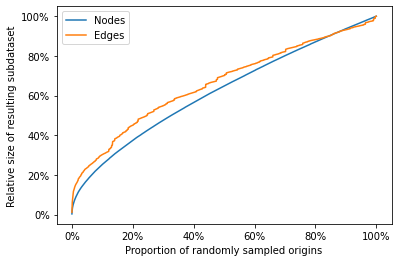

In [84]:
fig = plt.figure()
ax = fig.add_subplot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel("Proportion of randomly sampled origins")
ax.set_ylabel("Relative size of resulting subdataset")
ax.plot(origins, nodes, label="Nodes")
ax.plot(origins, edges, label="Edges")
ax.legend()
# ax.plot(origins, contents)
plt.savefig("../img/graph-exploitation/subdataset_size_function.pdf")

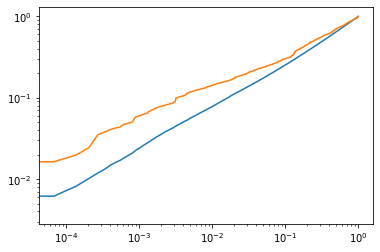

In [85]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(origins, nodes)
ax.plot(origins, edges)

In [60]:
# data_df = pd.DataFrame({'x': x, 'y': y})


def fitted_func(params):
    return params[0] * np.log(np.exp(params[2]) * x ** np.exp(params[1]) + 1)


def nodes_fitter(params):
    residuals = nodes - fitted_func(params)
    return np.sum(np.square(residuals))

def edges_fitter(params):
    residuals = edges - fitted_func(params)
    return np.sum(np.square(residuals))

%time coeffs_nodes = scipy.optimize.minimize(nodes_fitter, [1, 1, 1])
%time coeffs_edges = scipy.optimize.minimize(edges_fitter, [1, 1, 1])

CPU times: user 1.81 s, sys: 6.96 ms, total: 1.81 s
Wall time: 1.81 s
CPU times: user 1.71 s, sys: 3.3 ms, total: 1.72 s
Wall time: 1.72 s


In [64]:
print(coeffs_nodes.x)
print(coeffs_edges.x)

[496.04636835  -0.49882765  -6.21094918]
[254.59071892  -0.71972155  -5.55731883]


In [81]:
def simplified_nodes_func():
    return 500 * np.log(1 + 0.002 * x ** 0.6)

def simplified_edges_func():
    return 250 * np.log(1 + 0.004 * x ** 0.5)

nodes_hat = fitted_func(coeffs_nodes.x)
nodes_hat_simplified = simplified_nodes_func()

edges_hat = fitted_func(coeffs_edges.x)
edges_hat_simplified = simplified_edges_func()

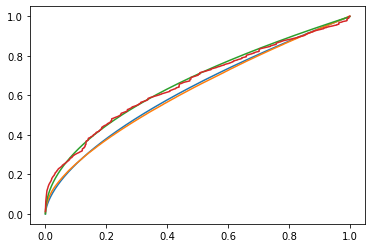

In [83]:
# plt.plot(origins, nodes_hat)
plt.plot(origins, nodes_hat_simplified)
plt.plot(origins, nodes)

# plt.plot(origins, edges_hat)
plt.plot(origins, edges_hat_simplified)
plt.plot(origins, edges)

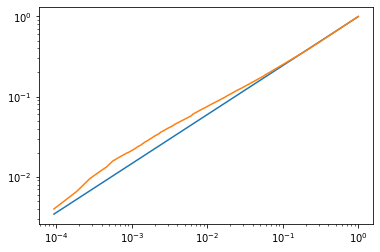

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y_hat)
ax.plot(x, y)